# 1. Utilizando o python para lidar com datasets

Neste cenário, iremos simular a criação de um dataset com várias tabelas e utilizar o python para referenciar e manipular informações através do dataset.

## 1.1 Simulando um dataset

Para o nosso caso de uso, utilizaremos a biblioteca [Faker](https://github.com/joke2k/faker). Para instalar a biblioteca, basta criar uma célula e executar o comando `pip install faker`. A biblioteca será instalada no ambiente do google colab. A biblioteca Faker é utilizada para gerar dados fictícios em diversas línguas diferentes. A primeira etapa da atividade envolve utilizar a biblioteca para gerar um conjunto de tabelas de dados com as especificações abaixo. Pede-se que os dados sejam gerados com a biblioteca (ver documentação extendida) e, posteriormente sejam criados dataframes para cada uma das situações. 

O dataset vai representar um conjunto de tabelas de bases de dados de clientes em uma livraria. Pretende-se simular o seguinte dataset:
* Clientes (250 entradas): <id_cliente, nome_cliente, idade_cliente>
* Vendedores (5 entradas): <id_vendedor, nome_vendedor>
* Categoria (5 entradas): <id_categoria, nome_categoria>
* Livros (50 entradas): <id_livro, nome_livro, id_categoria, valor_livro>
* Vendas (1000 entradas): <id_cliente, id_vendedor, id_livro, quantidade_livro>

Observações:
* Os identificadores de cliente, vendedor e livro devem ser números únicos. Para facilitar, use id's sequenciais;
* As idades de clientes devem ser números aleatórios entre 15 e 80;
* As quantidades de livros devem estar no intervalo `[1, 10]`;
* Os valores de livro devem estar no intervalo `[10, 500]`;
* O e-mail de um cliente deve ser o nome completo dele, em letras minúsculas, separado por `_`. Suponha que o único provedor de e-mails seja o gmail, para o nosso dataset. Por exemplo, `Cassia Almeida` teria o e-mail `cassia_almeida@gmail.com`.

DICAS:
* Para realizar a importação da biblioteca utilize `from faker import Faker`, após ter instalado a mesma no Google Colab;
* Para replicar os valores, de forma que cada vez que você rode inicice novamente o notebook, a mesma sequência de valores aleatórios apareça, você deve determinar o seed de geração de valores da biblioteca. Para isso, utilize `Faker.seed(10289)`;
* `fake = Faker(locale='en_US')` cria uma instância do Faker alinhado com dados de um determinado local. Vamos gerar os dados em inglês (O Faker só gera nomes em português bem. Sentenças e textos não. Outros caminhos, envolvendo por exemplo a biblioteca `nltk` não são tão simples para gerar sentenças e frases);
* Para gerar dados únicos, há o método `unique`, que vai ser utilizado como `fake.unique.<...>` para garantir que algo não se repita;
* Para gerar nomes dos livros, ou outros nomes, você pode usar os métodos `fake.word`, `fake.text` ou `fake.sentence`. Para controlar a quantidade de caracteres do texto com o `text`, utilize o parâmetro `max_nb_chars`. Já o `sentence` tem outro parâmetro chamado `nb_words`, que seleciona quantas palavras irão compor a sentença;
* Para gerar números inteiros aleatórios, você pode usar o método `numpy.random.randint`;
* Para gerar números reais aleatórios, você pode usar métodos a estilo do `numpy.random.uniform`. Não é o único tipo de método de amostragem de distribuições (tópico que veremos no futuro), mas é suficiente para a simulação desse trabalho.
* Ao gerar a tabela de Vendas, você terá de selecionar entre combinações únicas de Livros vendidos a Clientes por Vendedores. Para sortear os elementos dessa tabela, primeiro você deve gerar uma combinação de todas essa possíveis interações. Para isso, da biblioteca `itertools` utilize o método `product`. A partir disso, selecione aleatoriamente um subconjunto de casos para simular vendas diferentes. Para esse subconjunto, gere aleatoriamente as quantidades de livros que foram vendidos em cada venda;
* Para selecionar elementos tendo por base outra coluna já gerada, você pode usar método `numpy.random.choice`. Todavia, esse método só seleciona elementos com uma dimensão. Uma forma de selecionar elementros de múltiplas dimensões (como será o caso da tabela Vendas), você pode usar o `numpy.random.shuffle`, que embaralha automaticamente uma lista de elementos ou, também, o método `numpy.random.permutation`. Nesses últimos casos, tendo o vetor embaralhado, basta pegar os primeiros `n` elementos, que serão `n` elementos aleatórios;

Olhe exemplos de documentação na internet para compreender como utilizar o método. Para esta primeira etapa, gere um dataset com as especificações mostradas. Ao fim, exiba a head de cada um dos dataframes criados.

# Células de código

In [1]:
pip install faker

In [2]:
from faker import Faker

In [3]:
Faker.seed(10289)

## Tabela Clientes

In [4]:
fake = Faker(locale='en_US')

In [5]:
import random as rd

In [6]:
client_id = []
name_client = []
age_client = []
for i in range(0,250):
    number = fake.unique.random_int(min=1,max=999)
    client_id.append(number)
    name_client.append(fake.unique.name())
    age = fake.random_int(min=15,max=80)
    age_client.append(age)

In [7]:
import pandas as pd

clientes = {"id_cliente":client_id,
            "nome_cliente":name_client,
            "idade_cliente":age_client}

clientes_df = pd.DataFrame(clientes)
clientes_df

,id_cliente,nome_cliente,idade_cliente
0,55,David Edwards,56
1,157,Janice Turner,33
2,134,Jaime Coleman,15
3,881,Kevin Barton,18
4,621,Ashley Gomez,74
...,...,...,...
245,121,Amber Gonzalez,69
246,935,Matthew Holden,22
247,884,Kathy Knight,55
248,127,Wendy Smith,77


## Tabela Vendedores

In [8]:
vendor_id = []
vendor_name = []
for i in range(0,5):
    idn = fake.unique.random_int(min=1,max=25)
    vendor_id.append(idn)
    vendor_name.append(fake.unique.name())

In [9]:
vendedores = {"id_vendedor":vendor_id,
              "nome_vendedor":vendor_name}

vendedores_df = pd.DataFrame(vendedores)
vendedores_df

,id_vendedor,nome_vendedor
0,21,Gregory Bartlett
1,18,James Gould
2,2,Carly Leonard
3,11,Alyssa Gilbert
4,5,Kyle Massey


## Tabela Categorias

In [10]:
id_cat = []
cat_name = ["Romance","Terror","Ficção Científica","Infantil","Drama"]
for i in range(0,5):
    id_cat.append(fake.unique.random_int(min=1,max=10))

In [11]:
categoria = {"id_categoria":id_cat,
             "nome_categoria":cat_name}

categoria_df = pd.DataFrame(categoria)
categoria_df

,id_categoria,nome_categoria
0,10,Romance
1,2,Terror
2,7,Ficção Científica
3,5,Infantil
4,6,Drama


## Tabela Livros

In [12]:
book_id = []
book_name = []
cat_id = []
book_price = []
for i in range(0,50):
    book_id.append(fake.unique.random_int(min=1,max=200))
    book_name.append(fake.sentence(nb_words=5))
    number = id_cat[rd.randint(0,4)]
    cat_id.append(number)
    book_price.append(fake.unique.random_int(min=10,max=500))

In [13]:
livros = {"id_livro":book_id,
          "nome_livro":book_name,
          "id_categoria":cat_id,
          "valor_livro":book_price}

livros_df = pd.DataFrame(livros)
livros_df

,id_livro,nome_livro,id_categoria,valor_livro
0,176,Look begin accept parent.,7,354
1,126,You occur understand two young.,5,23
2,68,Institution left phone.,10,197
3,197,Green hold another.,10,463
4,9,Reality purpose ground century course apply.,2,16
5,58,All suggest note.,6,106
6,128,To try produce what or institution.,7,417
7,88,Rise whom possible east painting.,2,493
8,155,Force fire style really maintain.,2,226
9,160,Whose somebody high each hard.,7,363


## Tabela Vendas

In [14]:
sales_clients = []
sales_vendor_id = []
sales_book_id = []
amount_book = []
for i in range(0,1000):
    sales_clients.append(list(clientes_df["id_cliente"])[rd.randint(0,249)])
    sales_vendor_id.append(list(vendedores_df["id_vendedor"])[rd.randint(0,4)])
    sales_book_id.append(list(livros_df["id_livro"])[rd.randint(0,49)])
    amount_book.append(rd.randint(1,10))

In [15]:
vendas = {"id_cliente":sales_clients,
          "id_vendedor":sales_vendor_id,
          "id_livro":sales_book_id,
          "quantidade_livro":amount_book}

vendas_df = pd.DataFrame(vendas)
vendas_df

,id_cliente,id_vendedor,id_livro,quantidade_livro
0,271,5,137,8
1,931,5,197,6
2,649,5,15,2
3,182,2,15,8
4,823,11,111,6
...,...,...,...,...
995,2,5,160,8
996,297,21,93,4
997,645,5,28,1
998,420,18,165,5


## 1.2 Manipulando múltiplos dataframes em paralelo

Tendo um dataset gerado para o cenário atual, é possível, com `numpy`, `pandas`, dentre outras bibliotecas, incluindo o próprio python puro, realizar busca e manipulação dos dados. Para exercitar esses conceitos, solicita-se que você gere, utilizando a interface do pandas. um conjunto de novas tabelas com as seguintes informações:
1. Uma nova tabela de Livros, onde, ao invés de haver um código para a categoria, há uma coluna com o nome da categoria;
1. Uma nova tabela de Vendas, que relaciona o nome do Vendedor, o nome do Cliente e o nome do Livro, além da quantidade vendida.

# Células de código

## Tabela livros

In [16]:
copy_books = livros_df
copy_books

,id_livro,nome_livro,id_categoria,valor_livro
0,176,Look begin accept parent.,7,354
1,126,You occur understand two young.,5,23
2,68,Institution left phone.,10,197
3,197,Green hold another.,10,463
4,9,Reality purpose ground century course apply.,2,16
5,58,All suggest note.,6,106
6,128,To try produce what or institution.,7,417
7,88,Rise whom possible east painting.,2,493
8,155,Force fire style really maintain.,2,226
9,160,Whose somebody high each hard.,7,363


In [17]:
copy_books = copy_books.merge(categoria_df)
copy_books

,id_livro,nome_livro,id_categoria,valor_livro,nome_categoria
0,176,Look begin accept parent.,7,354,Ficção Científica
1,128,To try produce what or institution.,7,417,Ficção Científica
2,160,Whose somebody high each hard.,7,363,Ficção Científica
3,118,Guy physical doctor.,7,73,Ficção Científica
4,153,Degree thank single.,7,441,Ficção Científica
5,93,Share student car official.,7,480,Ficção Científica
6,83,Collection computer not how.,7,301,Ficção Científica
7,126,You occur understand two young.,5,23,Infantil
8,137,On me much store.,5,408,Infantil
9,172,Require across bill yard.,5,476,Infantil


In [18]:
copy_books.drop("id_categoria", axis=1)

,id_livro,nome_livro,valor_livro,nome_categoria
0,176,Look begin accept parent.,354,Ficção Científica
1,128,To try produce what or institution.,417,Ficção Científica
2,160,Whose somebody high each hard.,363,Ficção Científica
3,118,Guy physical doctor.,73,Ficção Científica
4,153,Degree thank single.,441,Ficção Científica
5,93,Share student car official.,480,Ficção Científica
6,83,Collection computer not how.,301,Ficção Científica
7,126,You occur understand two young.,23,Infantil
8,137,On me much store.,408,Infantil
9,172,Require across bill yard.,476,Infantil


## Tabela vendas

In [19]:
copy_sales = vendas_df
copy_sales

,id_cliente,id_vendedor,id_livro,quantidade_livro
0,271,5,137,8
1,931,5,197,6
2,649,5,15,2
3,182,2,15,8
4,823,11,111,6
...,...,...,...,...
995,2,5,160,8
996,297,21,93,4
997,645,5,28,1
998,420,18,165,5


In [20]:
copy_sales = copy_sales.merge(vendedores_df)
copy_sales

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor
0,271,5,137,8,Kyle Massey
1,931,5,197,6,Kyle Massey
2,649,5,15,2,Kyle Massey
3,709,5,82,3,Kyle Massey
4,521,5,47,3,Kyle Massey
...,...,...,...,...,...
995,780,21,128,10,Gregory Bartlett
996,344,21,88,7,Gregory Bartlett
997,823,21,79,6,Gregory Bartlett
998,50,21,120,7,Gregory Bartlett


In [21]:
copy_sales = copy_sales.merge(clientes_df)
copy_sales

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor,nome_cliente,idade_cliente
0,271,5,137,8,Kyle Massey,Monica Calderon,15
1,271,5,160,3,Kyle Massey,Monica Calderon,15
2,271,5,115,3,Kyle Massey,Monica Calderon,15
3,271,21,128,7,Gregory Bartlett,Monica Calderon,15
4,931,5,197,6,Kyle Massey,James Rodriguez,38
...,...,...,...,...,...,...,...
995,403,21,14,1,Gregory Bartlett,Ricky Preston,60
996,403,21,176,6,Gregory Bartlett,Ricky Preston,60
997,588,21,118,7,Gregory Bartlett,Connor House,30
998,588,21,95,6,Gregory Bartlett,Connor House,30


In [22]:
copy_sales = copy_sales.merge(livros_df)
copy_sales

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor,nome_cliente,idade_cliente,nome_livro,id_categoria,valor_livro
0,271,5,137,8,Kyle Massey,Monica Calderon,15,On me much store.,5,408
1,524,18,137,8,James Gould,Annette Ingram,33,On me much store.,5,408
2,430,5,137,10,Kyle Massey,Shane Stone,74,On me much store.,5,408
3,690,5,137,1,Kyle Massey,Cynthia Jackson,66,On me much store.,5,408
4,276,21,137,8,Gregory Bartlett,Sarah Bernard,33,On me much store.,5,408
...,...,...,...,...,...,...,...,...,...,...
995,708,21,79,10,Gregory Bartlett,Frank Little,52,Hundred present wife cut.,2,395
996,454,11,79,9,Alyssa Gilbert,Misty Lutz,30,Hundred present wife cut.,2,395
997,971,18,79,5,James Gould,Ebony Bennett,51,Hundred present wife cut.,2,395
998,534,18,79,5,James Gould,Catherine Garcia,69,Hundred present wife cut.,2,395


In [23]:
copy_sales_id = copy_sales

sales_id = []
for i in range(0,1000):
    sales_id.append(fake.unique.random_int(min=1,max=2500))
    
copy_sales_id["id_venda"] = sales_id
copy_sales_id

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor,nome_cliente,idade_cliente,nome_livro,id_categoria,valor_livro,id_venda
0,271,5,137,8,Kyle Massey,Monica Calderon,15,On me much store.,5,408,1697
1,524,18,137,8,James Gould,Annette Ingram,33,On me much store.,5,408,1366
2,430,5,137,10,Kyle Massey,Shane Stone,74,On me much store.,5,408,2371
3,690,5,137,1,Kyle Massey,Cynthia Jackson,66,On me much store.,5,408,1950
4,276,21,137,8,Gregory Bartlett,Sarah Bernard,33,On me much store.,5,408,173
...,...,...,...,...,...,...,...,...,...,...,...
995,708,21,79,10,Gregory Bartlett,Frank Little,52,Hundred present wife cut.,2,395,414
996,454,11,79,9,Alyssa Gilbert,Misty Lutz,30,Hundred present wife cut.,2,395,2089
997,971,18,79,5,James Gould,Ebony Bennett,51,Hundred present wife cut.,2,395,2431
998,534,18,79,5,James Gould,Catherine Garcia,69,Hundred present wife cut.,2,395,200


## 1.3 Fazendo consultas compostas utilizando os múltiplos dataframes do dataset

Vamos supor que queiramos retirar um conjunto de informações a respeito dessas tabelas de dados, que estão representadas com DataFrames. Essas informações poderiam ser úteis para um cenário real onde tivessemos esses dados a respeito das vendas da livraria. Implemente um código para extrair as seguintes informações. Esse código vai requerer o uso de algumas funções apresentadas em sala de aula a respeito dos dataframes:
1. Os nomes dos livros que tiveram alguma venda já realizada e os nomes dos livros que não tiveram nenhuma venda realizada;
1. Uma lista de clientes cadastrados na loja mas que nunca compraram nenhum livro;
1. Uma lista com as quantidades vendidas de cada livro. Apresente, ao final, o livro mais vendido e o livro menos vendido;
1. Uma lista com os nomes dos clientes e os nomes dos livros que aquele cliente comprou;
1. Para cada vendedor, os nomes dos clientes que eles já atenderam;
1. Um relatório de quantos clientes, em média, cada vendedor atendeu. Apresente também o nome do vendedor que atendeu o menor número de clientes e o maior número de clientes e quantos clientes esses vendedores atenderam.
1. Para cada categoria, resgate a quantidade de livros que estão em cada categoria. Apresente a categoria que tem mais livros e também a categoria que tem menos livros.

# Células de código

## 1. Nomes dos livros vendidos e não vendidos

In [24]:
inventory = list(livros_df["nome_livro"])
inventory

['Look begin accept parent.',
 'You occur understand two young.',
 'Institution left phone.',
 'Green hold another.',
 'Reality purpose ground century course apply.',
 'All suggest note.',
 'To try produce what or institution.',
 'Rise whom possible east painting.',
 'Force fire style really maintain.',
 'Whose somebody high each hard.',
 'On me much store.',
 'People pull religious nearly idea.',
 'Material well pay.',
 'Require across bill yard.',
 'Although in trade network less provide factor.',
 'Scientist by late community story.',
 'Teacher research so sound cover character.',
 'Guy physical doctor.',
 'Either appear leader six large although.',
 'When me choose drug hot serious.',
 'Simple land no wrong.',
 'Fall less travel.',
 'Avoid he series five.',
 'Final action play more section teach.',
 'Fast century candidate amount who.',
 'Alone hard write glass represent.',
 'Charge eight interest office north product.',
 'Population half activity something population.',
 'Walk abi

In [25]:
sold = []
not_sold = []

for i in inventory:
    if i not in list(copy_sales["nome_livro"]):
        not_sold.append(i)
    else:
        sold.append(i)

num = len(sold) - len(not_sold)
num

50

Todos os livros no estoque da loja já foram vendidos no mínimo uma vez.

## 2. Lista de clientes cadastrados mas que nunca compraram na loja

In [26]:
registered_clients = list(clientes_df["nome_cliente"])
registered_clients

['David Edwards',
 'Janice Turner',
 'Jaime Coleman',
 'Kevin Barton',
 'Ashley Gomez',
 'Anne Ward',
 'Michael Munoz',
 'Kristin Gamble',
 'Eric Fleming',
 'Martha Dunn',
 'Susan Johnson',
 'David Collier',
 'Krista Mcknight',
 'Allen Herrera',
 'Sarah Cook',
 'Stephanie Watson',
 'Kristi Grimes',
 'Stacy Terrell',
 'Amy Patton',
 'Jamie Good',
 'Glenn Hernandez',
 'Steven Coleman MD',
 'Deborah Walker',
 'Michael Cochran',
 'James Rodriguez',
 'Kristine Taylor',
 'Devin Wilson',
 'Ann Stanton',
 'Jason Sherman',
 'Thomas Wilson',
 'Zachary Hanson',
 'Annette Ingram',
 'Daniel Camacho',
 'Karen Beck',
 'Kathleen Randolph',
 'Jessica Harper',
 'Stephen Stone',
 'William Fischer',
 'Chad Hughes',
 'Jamie Garcia',
 'Linda Barnes',
 'Jerry Kramer',
 'Mariah Harris',
 'Frank Little',
 'Erik Williams',
 'Jose Harris',
 'Angel Conway',
 'Robin Wilson',
 'Molly Daniel',
 'Jared Blackwell',
 'Edwin Weber',
 'Tracey Miles',
 'Ashley Jones',
 'Beverly Bass',
 'Amber Mcknight',
 'Andrea Brewer',


In [27]:
non_buyers = []
buyers = []

for i in registered_clients:
    if i not in list(copy_sales["nome_cliente"]):
        non_buyers.append(i)
    else:
        buyers.append(i)

non_buyers

['Daniel Camacho', 'Samantha Mccoy', 'Sean Marshall', 'Cassidy Johnson']

## 3. Quantidades vendidas de cada livro

In [28]:
def multiplicar_por_qtde(df,identificador):
    identifier = df[df["id_venda"] == identificador]
    df_repeated = pd.concat([identifier]*identifier["quantidade_livro"].values[0],
                                ignore_index=True, axis = 0)
    return df_repeated

In [29]:
def new_sales_df(data):
    df_box = []
    for i in list(data["id_venda"]):
        true_numbers = multiplicar_por_qtde(data,i)
        df_box.append(true_numbers)
    final = pd.concat(df_box,ignore_index=True)
    return final

In [30]:
sales_id_multiplied = new_sales_df(copy_sales_id)
sales_id_multiplied

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor,nome_cliente,idade_cliente,nome_livro,id_categoria,valor_livro,id_venda
0,271,5,137,8,Kyle Massey,Monica Calderon,15,On me much store.,5,408,1697
1,271,5,137,8,Kyle Massey,Monica Calderon,15,On me much store.,5,408,1697
2,271,5,137,8,Kyle Massey,Monica Calderon,15,On me much store.,5,408,1697
3,271,5,137,8,Kyle Massey,Monica Calderon,15,On me much store.,5,408,1697
4,271,5,137,8,Kyle Massey,Monica Calderon,15,On me much store.,5,408,1697
...,...,...,...,...,...,...,...,...,...,...,...
5475,534,18,79,5,James Gould,Catherine Garcia,69,Hundred present wife cut.,2,395,200
5476,351,18,79,4,James Gould,Ann Stanton,57,Hundred present wife cut.,2,395,2289
5477,351,18,79,4,James Gould,Ann Stanton,57,Hundred present wife cut.,2,395,2289
5478,351,18,79,4,James Gould,Ann Stanton,57,Hundred present wife cut.,2,395,2289


In [31]:
def books_sold(data):
    nomes = []
    qtde_vendas = []
    for name in data["nome_livro"]:
        individual_df = data[data["nome_livro"] == name]
        n_sales = sum(individual_df["quantidade_livro"])
        individual_df = individual_df.drop_duplicates("nome_livro")
        if name not in nomes:
            nomes.append(individual_df["nome_livro"].values[0])
            qtde_vendas.append(n_sales)
    next_df = pd.DataFrame({"nome_livro":nomes,
                            "quantidade_livro":qtde_vendas})
    new_df = next_df.sort_values(by="quantidade_livro",ignore_index=True,
                                 ascending=False)
    return new_df

In [32]:
vendas_livros = books_sold(sales_id_multiplied)
vendas_livros

,nome_livro,quantidade_livro
0,Find alone news crime character.,1131
1,On me much store.,1053
2,You occur understand two young.,1047
3,Well argue admit argue travel.,1045
4,Week meet positive per.,1032
5,Model new police dream green indeed.,985
6,All suggest note.,966
7,Material well pay.,954
8,Guy physical doctor.,938
9,Walk ability business owner.,935


O livro mais vendido foi 'Find alone news crime character.' (1131 cópias) e o menos vendido foi 'Along bill yeah first newspaper.' (373 cópias).

## 4. Lista de clientes e livros comprados

In [33]:
def client_books(data):
    nomes = []
    livros_comprados = []
    for name in data["nome_cliente"]:
        individual_df = data[data["nome_cliente"] == name]
        booklist = list(individual_df["nome_livro"])
        individual_df = individual_df.drop_duplicates("nome_cliente")
        if name not in nomes:
            nomes.append(individual_df["nome_cliente"].values[0])
            livros_comprados.append(booklist)
    next_df = pd.DataFrame({"nome_cliente":nomes,
                            "livros_comprados":livros_comprados})
    return next_df

In [34]:
clientes_livros = client_books(copy_sales)
clientes_livros

,nome_cliente,livros_comprados
0,Monica Calderon,"[On me much store., Whose somebody high each h..."
1,Annette Ingram,"[On me much store., To try produce what or ins..."
2,Shane Stone,"[On me much store., Bring possible us ahead ch..."
3,Cynthia Jackson,"[On me much store., Worry trade despite meet s..."
4,Sarah Bernard,"[On me much store., Available again computer s..."
...,...,...
241,Thomas Jackson,[Although in trade network less provide factor...
242,Jamie Good,"[Model new police dream green indeed., Decade ..."
243,Brandon Smith,[Model new police dream green indeed.]
244,Robert Anderson,[Decade will leg entire say.]


## 5. Clientes atendidos por vendedor

In [35]:
def vendor_clients(data):
    nomes = []
    clientes_atendidos = []
    for name in data["nome_vendedor"]:
        individual_df = data[data["nome_vendedor"] == name]
        clientlist = list(individual_df["nome_cliente"])
        individual_df = individual_df.drop_duplicates("nome_vendedor")
        if name not in nomes:
            nomes.append(individual_df["nome_vendedor"].values[0])
            clientes_atendidos.append(clientlist)
    next_df = pd.DataFrame({"nome_vendedor":nomes,
                            "clientes_atendidos":clientes_atendidos})
    return next_df

In [36]:
clientes_por_vendedor = vendor_clients(copy_sales)
clientes_por_vendedor

,nome_vendedor,clientes_atendidos
0,Kyle Massey,"[Monica Calderon, Shane Stone, Cynthia Jackson..."
1,James Gould,"[Annette Ingram, Kathy Knight, Frank Little, L..."
2,Gregory Bartlett,"[Sarah Bernard, Ryan Arnold, Shawn Johnson, Je..."
3,Carly Leonard,"[Amber Gonzalez, Matthew Holden, Timothy Parke..."
4,Alyssa Gilbert,"[Chad Lara, Phillip Brooks, Micheal Moore, Jen..."


## 6. Quantidade de clientes atendidos por vendedor

In [37]:
def vendor_clients_numbers(data):
    nomes = []
    n_clientes_atendidos = []
    for name in data["nome_vendedor"]:
        individual_df = data[data["nome_vendedor"] == name]
        for e in range(0,len(individual_df)):
            n_clients = len(list(individual_df["clientes_atendidos"])[e])
        individual_df = individual_df.drop_duplicates("nome_vendedor")
        if name not in nomes:
            nomes.append(individual_df["nome_vendedor"].values[0])
            n_clientes_atendidos.append(n_clients)
    next_df = pd.DataFrame({"nome_vendedor":nomes,
                            "n_clientes_atendidos":n_clientes_atendidos})
    new_df = next_df.sort_values(by="n_clientes_atendidos", ignore_index=True,
                                 ascending=False)
    return new_df

In [38]:
qtde_clientes_por_vendedor = vendor_clients_numbers(clientes_por_vendedor)
qtde_clientes_por_vendedor

,nome_vendedor,n_clientes_atendidos
0,James Gould,207
1,Carly Leonard,203
2,Kyle Massey,202
3,Gregory Bartlett,198
4,Alyssa Gilbert,190


### Média

In [39]:
qtde_clientes_por_vendedor.mean(numeric_only=True)

n_clientes_atendidos    200.0
dtype: float64

O vendedor que atendeu mais clientes foi 'James Gould' (207 clientes) e quem atendeu menos clientes foi 'Alyssa Gilbert' (190 clientes).

## 7. Livros por categoria

In [40]:
def books_cat(data):
    nomes = []
    qtde_livros = []
    for name in data["nome_categoria"]:
        individual_df = data[data["nome_categoria"] == name]
        booklist = list(individual_df["nome_livro"])
        n_cat = len(booklist)
        individual_df = individual_df.drop_duplicates("nome_categoria")
        if name not in nomes:
            nomes.append(individual_df["nome_categoria"].values[0])
            qtde_livros.append(n_cat)
    next_df = pd.DataFrame({"nome_categoria":nomes,
                            "quantidade_livros":qtde_livros})
    new_df = next_df.sort_values(by="quantidade_livros",ignore_index=True,
                                 ascending=False)
    return new_df

In [41]:
livros_por_categoria = books_cat(copy_books)
livros_por_categoria

,nome_categoria,quantidade_livros
0,Romance,13
1,Terror,13
2,Drama,9
3,Infantil,8
4,Ficção Científica,7


As categorias que mais possuem livros na loja são 'Romance' e 'Terror' (13). A categoria com menos livros é 'Ficção Científica' (7).

# 1.4 Exibindo dados com o pandas / matplotlib

A biblioteca `pandas` tem integração com a biblioteca `matplotlib` para a exibicação de gráficos a respeito dos dados. Ou seja, é possível utilizar os métodos do pandas ou, extrair os dados do pandas e utilizar a tela padrão de desenho da `matplotlib`, a `matplotlib.pyplot` para realizar desenhos de listas, dicionários, ou arrays numpy. Há, portanto, uma correspondência entre as funções de desenho que o pandas tem e as funções que a tela `pyplot` do `matplotlib` tem. Para exercitar esses conceitos, vamos utilizar o caso de uso atual e realizar algumas exibições de gráficos.

Para utilizar o matplotlib, usualmente realiza-se o import do tipo `import matplotlib.pyplot as plt` e, o `plt` tem a tela padrão de desenho do matplotlib. A biblioteca suporta funcionalidades mais complexas, como por exemplo mútiplos desenhos independentes em paralelo, altíssimos níveis de customização de gráficos, dentre outras funcionalidades. Mas para a nossa finalidade utilizaremos esse padrão.

Embora o `pandas` ofereça boas funcionalidades de exibição de gráficos, em algumas circunstâncias, a depender do nível de customização requerido, pode ser interessante utilizar o `matplotlib` ao invés do `pandas`.

Dentre os gráficos, alguns são interessantes:

- `plot`: gráficos de linha usuais;
- `bar` ou `barh`: gráfico de barras verticais ou horizontais;
- `hist`: histogramas de dados;
- `box`: para os boxplot;
- `kde` ou `density`: para plots de densidade (distribuição contínua) de dados;
- `scatter`: para mostrar a dispersão dos dados;

Esses gráficos tanto podem ser obtidos a partir dos DataFrames (ou seja, como métodos desses objetos) ou podem ser acessados como métodos do `plt` do matplotlib.

Implemente os códigos que exibem os items a seguir:

1. Gráfico de barras horizontais que exibe a quantidade de vendas realizadas por cada vendedor;
2. Um gráfico de barras verticais onde, para cada vendedor, exibe-se a quantidade de livros vendidos por categoria. Dica: usar a função `unstack` após o agrupamento por múltiplas colunas;
3. Um plot (gráfico de linha usual) que relaciona a quantidade de clientes atentidos por vendedor. Desenhar uma linha horizontal vermelha especificando a média da quantidade de clientes. Isso será útil para comparar os atendimentos dos vendedores com relação à média de clientes atendidos por vendedor. Dica: atribua o retorno do plot a uma variável `ax`. Essa variável `ax` é um objeto do `matplotlib` e tem métodos de plot embutidos, como por exemplo o `axhline` (para linhas horizontais). Se quiser colocar uma legenda explicando cada plot, basta utilizar `ax.legend`;
4. A distribuição de quantidades de livros comprados por clientes. Faça o histograma usual e também desenhe a densidade desses dados. DICA: para usar o plot de `kde` será necessário importar a biblioteca científica `scipy`;
5. Um gráfico de barras da quantidade de livros por categoria. Adicione uma linha horizontal com a média da quantidade de livros por categoria.

# Células de código

## 1. Vendas realizadas por cada vendedor

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Spectral",n_colors=5)

In [43]:
def vendor_n_books(data):
    nomes = []
    qtde_vendas = []
    for name in data["nome_vendedor"]:
        individual_df = data[data["nome_vendedor"] == name]
        n_sales = sum(individual_df["quantidade_livro"])
        individual_df = individual_df.drop_duplicates("nome_vendedor")
        if name not in nomes:
            nomes.append(individual_df["nome_vendedor"].values[0])
            qtde_vendas.append(n_sales)
    next_df = pd.DataFrame({"nome_vendedor":nomes,
                            "livros_vendidos":qtde_vendas})
    new_df = next_df.sort_values(by="livros_vendidos",ignore_index=True,
                                 ascending=False)
    return new_df

In [44]:
vendas_totais_vendedores = vendor_n_books(copy_sales)
vendas_totais_vendedores

,nome_vendedor,livros_vendidos
0,James Gould,1110
1,Carly Leonard,1101
2,Gregory Bartlett,1098
3,Kyle Massey,1095
4,Alyssa Gilbert,1076


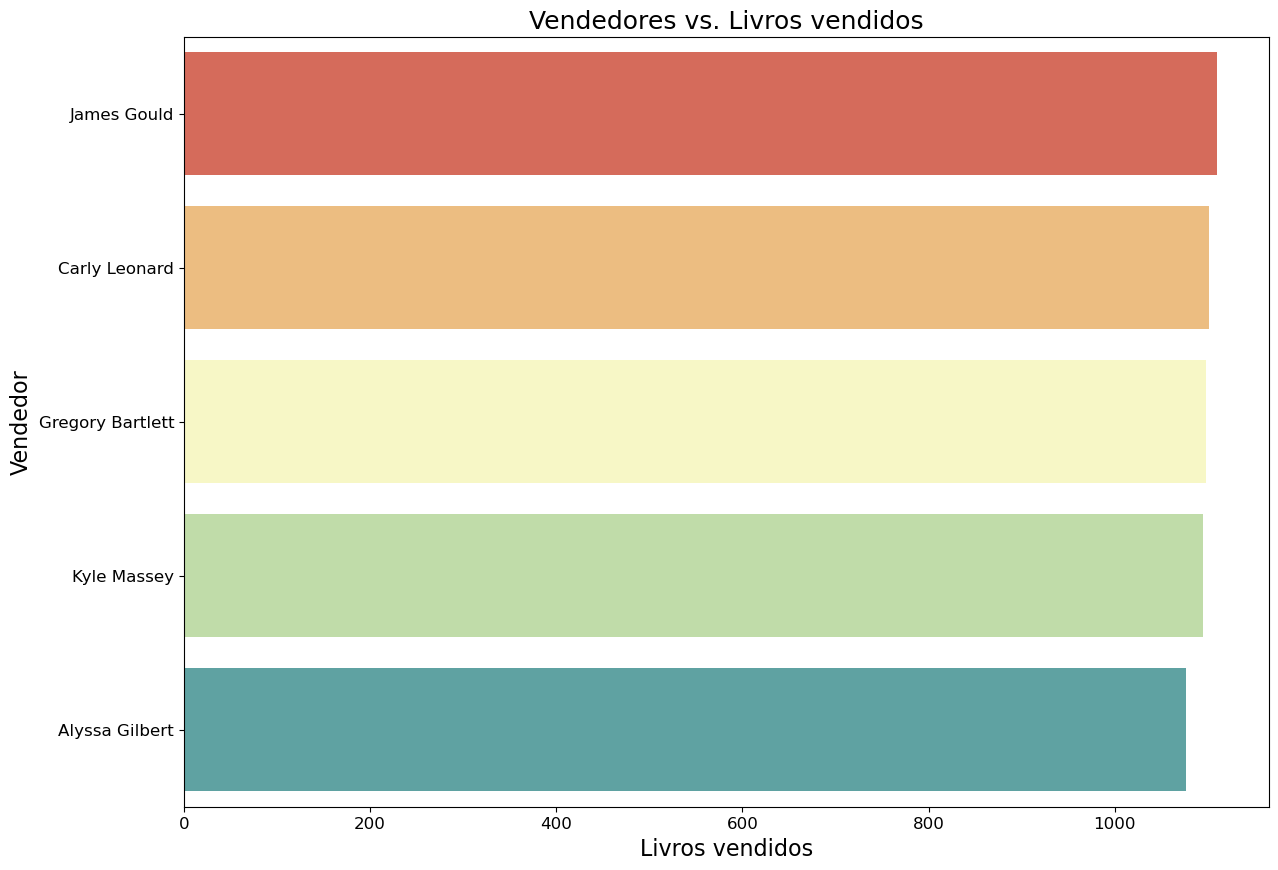

In [45]:
plt.figure(figsize=(14,10))
ax = sns.barplot(vendas_totais_vendedores,x="livros_vendidos",
                 y="nome_vendedor",palette=colors)
ax.axes.set_title("Vendedores vs. Livros vendidos",fontsize=18)
ax.set_xlabel("Livros vendidos",fontsize=16)
ax.set_ylabel("Vendedor",fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

## 2. Vendas por categoria, por cada vendedor

In [46]:
def vendor_books_sold(data):
    nomes = []
    livros_vendidos = []
    for name in data["nome_vendedor"]:
        individual_df = data[data["nome_vendedor"] == name]
        booklist = list(individual_df["nome_livro"])
        individual_df = individual_df.drop_duplicates("nome_vendedor")
        if name not in nomes:
            nomes.append(individual_df["nome_vendedor"].values[0])
            livros_vendidos.append(booklist)
    next_df = pd.DataFrame({"nome_vendedor":nomes,
                            "livros_vendidos":livros_vendidos})
    return next_df

In [47]:
livros_por_vendedor = vendor_books_sold(sales_id_multiplied)
livros_por_vendedor

,nome_vendedor,livros_vendidos
0,Kyle Massey,"[On me much store., On me much store., On me m..."
1,James Gould,"[On me much store., On me much store., On me m..."
2,Gregory Bartlett,"[On me much store., On me much store., On me m..."
3,Carly Leonard,"[On me much store., On me much store., On me m..."
4,Alyssa Gilbert,"[On me much store., On me much store., On me m..."


In [48]:
books = []
vendors = []
for i in range(0,5):
    for e in list(livros_por_vendedor["livros_vendidos"])[i]:
        vendors.append(livros_por_vendedor["nome_vendedor"][i])
        books.append(e)

books_vendors_dict = {"nome_vendedor":vendors,
                      "nome_livro":books}

books_vendors_df = pd.DataFrame(books_vendors_dict)
books_vendors_df

,nome_vendedor,nome_livro
0,Kyle Massey,On me much store.
1,Kyle Massey,On me much store.
2,Kyle Massey,On me much store.
3,Kyle Massey,On me much store.
4,Kyle Massey,On me much store.
...,...,...
5475,Alyssa Gilbert,Hundred present wife cut.
5476,Alyssa Gilbert,Hundred present wife cut.
5477,Alyssa Gilbert,Hundred present wife cut.
5478,Alyssa Gilbert,Hundred present wife cut.


In [49]:
books_vendors_copy = books_vendors_df.merge(copy_books)
books_vendors_copy

,nome_vendedor,nome_livro,id_livro,id_categoria,valor_livro,nome_categoria
0,Kyle Massey,On me much store.,137,5,408,Infantil
1,Kyle Massey,On me much store.,137,5,408,Infantil
2,Kyle Massey,On me much store.,137,5,408,Infantil
3,Kyle Massey,On me much store.,137,5,408,Infantil
4,Kyle Massey,On me much store.,137,5,408,Infantil
...,...,...,...,...,...,...
5475,Alyssa Gilbert,Interesting approach support common rock.,157,10,50,Romance
5476,Alyssa Gilbert,Interesting approach support common rock.,157,10,50,Romance
5477,Alyssa Gilbert,Interesting approach support common rock.,157,10,50,Romance
5478,Alyssa Gilbert,Interesting approach support common rock.,157,10,50,Romance


In [50]:
def function_vendors(data,vendor_name):
    individual_df = data[data["nome_vendedor"] == vendor_name]
    idf_series = individual_df["nome_categoria"].value_counts()
    return idf_series

In [51]:
kyle = function_vendors(books_vendors_copy,"Kyle Massey")
kyle

Romance              268
Infantil             238
Terror               231
Drama                207
Ficção Científica    151
Name: nome_categoria, dtype: int64

In [52]:
alyssa = function_vendors(books_vendors_copy,"Alyssa Gilbert")
alyssa

Terror               346
Romance              251
Ficção Científica    168
Drama                164
Infantil             147
Name: nome_categoria, dtype: int64

In [53]:
james = function_vendors(books_vendors_copy,"James Gould")
james

Terror               404
Romance              243
Infantil             214
Drama                134
Ficção Científica    115
Name: nome_categoria, dtype: int64

In [54]:
greg = function_vendors(books_vendors_copy,"Gregory Bartlett")
greg

Terror               339
Romance              221
Drama                209
Ficção Científica    208
Infantil             121
Name: nome_categoria, dtype: int64

In [55]:
carly = function_vendors(books_vendors_copy,"Carly Leonard")
carly

Romance              327
Terror               257
Drama                201
Infantil             198
Ficção Científica    118
Name: nome_categoria, dtype: int64

In [56]:
vendors_cat_dict = {"nome_vendedor":["Kyle Massey","Alyssa Gilbert",
                                     "James Gould","Gregory Bartlett",
                                     "Carly Leonard","Kyle Massey",
                                     "Alyssa Gilbert","James Gould",
                                     "Gregory Bartlett","Carly Leonard",
                                     "Kyle Massey","Alyssa Gilbert",
                                     "James Gould","Gregory Bartlett",
                                     "Carly Leonard","Kyle Massey",
                                     "Alyssa Gilbert","James Gould",
                                     "Gregory Bartlett","Carly Leonard",
                                     "Kyle Massey","Alyssa Gilbert",
                                     "James Gould","Gregory Bartlett",
                                     "Carly Leonard"],
                    "nome_categoria":["Drama","Drama","Drama","Drama",
                                      "Drama","Ficção Científica",
                                     "Ficção Científica","Ficção Científica",
                                     "Ficção Científica","Ficção Científica",
                                     "Romance","Romance","Romance",
                                     "Romance","Romance","Infantil",
                                     "Infantil","Infantil","Infantil",
                                     "Infantil", "Terror","Terror",
                                     "Terror","Terror","Terror"],
                    "qtde_por_categoria":[207,264,134,209,201,151,168,115,208,118,
                                          268,251,243,221,327,238,147,214,121,198,
                                          231,346,404,339,257]}

vendors_cat_df = pd.DataFrame(vendors_cat_dict)
vendors_cat_df

,nome_vendedor,nome_categoria,qtde_por_categoria
0,Kyle Massey,Drama,207
1,Alyssa Gilbert,Drama,264
2,James Gould,Drama,134
3,Gregory Bartlett,Drama,209
4,Carly Leonard,Drama,201
5,Kyle Massey,Ficção Científica,151
6,Alyssa Gilbert,Ficção Científica,168
7,James Gould,Ficção Científica,115
8,Gregory Bartlett,Ficção Científica,208
9,Carly Leonard,Ficção Científica,118


<Axes: xlabel='nome_vendedor', ylabel='qtde_por_categoria'>

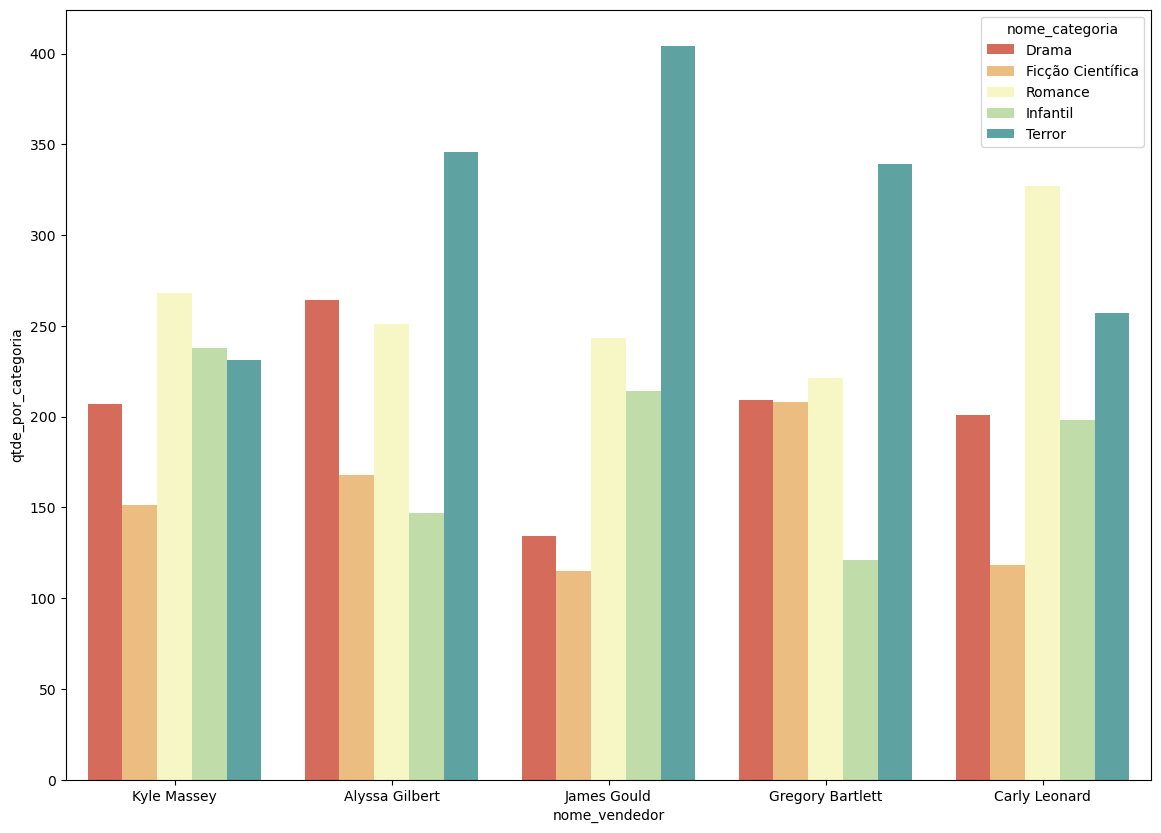

In [57]:
plt.figure(figsize=(14,10))
sns.barplot(vendors_cat_df,x="nome_vendedor",y="qtde_por_categoria",
            hue="nome_categoria",palette=colors)

## 3. Clientes atendidos por vendedor

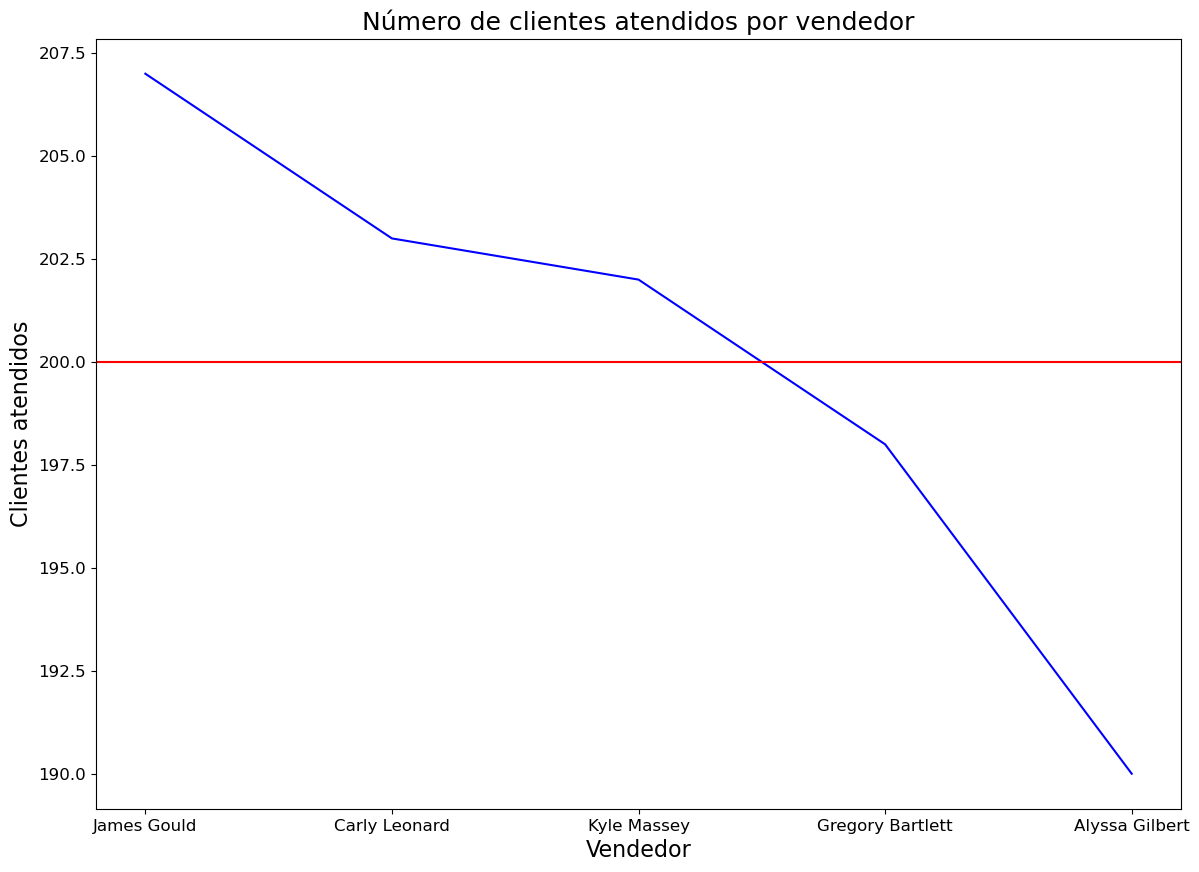

In [58]:
plt.figure(figsize=(14,10))
ax = sns.lineplot(qtde_clientes_por_vendedor,x="nome_vendedor",
                 y="n_clientes_atendidos",color="blue")
ax.axes.set_title("Número de clientes atendidos por vendedor",fontsize=18)
ax.set_xlabel("Vendedor",fontsize=16)
ax.set_ylabel("Clientes atendidos",fontsize=16)
ax.tick_params(labelsize=12)
ax.axhline(y=200.0,color="red")
plt.show()

## 4. Distribuição da quantidade de livros por cliente

In [59]:
def clients_n_books(data):
    nomes = []
    qtde_compras = []
    for name in data["nome_cliente"]:
        individual_df = data[data["nome_cliente"] == name]
        n_sales = sum(individual_df["quantidade_livro"])
        individual_df = individual_df.drop_duplicates("nome_cliente")
        if name not in nomes:
            nomes.append(individual_df["nome_cliente"].values[0])
            qtde_compras.append(n_sales)
    next_df = pd.DataFrame({"nome_cliente":nomes,
                            "livros_comprados":qtde_compras})
    new_df = next_df.sort_values(by="livros_comprados",ignore_index=True,
                                 ascending=False)
    return new_df

In [60]:
qtde_livros_por_cliente = clients_n_books(sales_id_multiplied)
qtde_livros_por_cliente

,nome_cliente,livros_comprados
0,Martha Dunn,517
1,Michelle Murphy,483
2,Denise Brooks,445
3,Rebecca Mendoza,394
4,Samuel Reed,387
...,...,...
241,Devin Wilson,9
242,Darren Brown,6
243,Thomas Ward,4
244,John Herrera,4


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

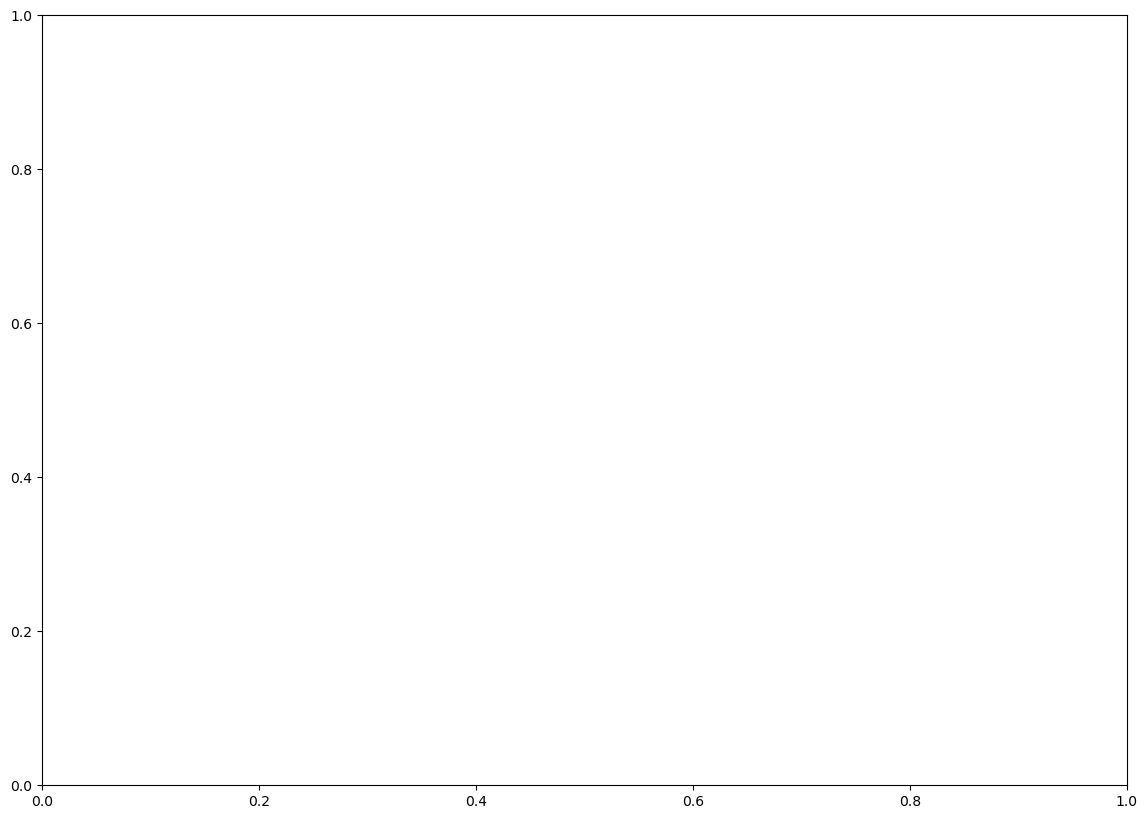

In [62]:
plt.figure(figsize=(14,10))
sns.kdeplot(qtde_livros_por_cliente,x="nome_cliente",
             y="livros_comprados",kde=True)

# 2. Atividade bônus

Faça o download de algum banco de dado de seu interesse no Kagle e faça uma análise descrivita de informações, além de plots, do que julgar relevante apresentar sobre o banco de dados escolhido.

In [ ]:
# Células de código